In [ ]:
import pandas as pd
import sys
import numpy as np

sys.path.append("../../")
# get repo root actual dir (for file reading)
from helpers.system_helpers.repo_root import REPO_ROOT
from helpers.data_helpers.elexon_api_helpers import call_physbm_api, fetch_physical_data
from pyproj import Transformer
from helpers.constants import DATA_DIR

config = {
    "start_date": "01/01/2024",
    "end_date": "01/09/2025",
    "repd_name": "doronell",
    "elexon_id": ["T_DOREW-1", "T_DOREW-2"],
}

start_date = config["start_date"]
end_date = config["end_date"]
repd_name = config["repd_name"]
elexon_id = config["elexon_id"]

met_ss_api = "eyJ4NXQjUzI1NiI6Ik5XVTVZakUxTkRjeVl6a3hZbUl4TkdSaFpqSmpOV1l6T1dGaE9XWXpNMk0yTWpRek5USm1OVEE0TXpOaU9EaG1NVFJqWVdNellXUm1ZalUyTTJJeVpBPT0iLCJraWQiOiJnYXRld2F5X2NlcnRpZmljYXRlX2FsaWFzIiwidHlwIjoiSldUIiwiYWxnIjoiUlMyNTYifQ==.eyJzdWIiOiJGYXJxdWhhcnNvbmFyQGdtYWlsLmNvbUBjYXJib24uc3VwZXIiLCJhcHBsaWNhdGlvbiI6eyJvd25lciI6IkZhcnF1aGFyc29uYXJAZ21haWwuY29tIiwidGllclF1b3RhVHlwZSI6bnVsbCwidGllciI6IlVubGltaXRlZCIsIm5hbWUiOiJzaXRlX3NwZWNpZmljLTkwMDEzZmUxLWQ1YmUtNDFjOC04YWJiLTQ1Zjc2ZjI1MTdkZCIsImlkIjoyNTQ2MywidXVpZCI6ImRhMjBhMWNiLWVhOTItNDEzNS1hOGI0LTJkMDYxNDNjYzQwYSJ9LCJpc3MiOiJodHRwczpcL1wvYXBpLW1hbmFnZXIuYXBpLW1hbmFnZW1lbnQubWV0b2ZmaWNlLmNsb3VkOjQ0M1wvb2F1dGgyXC90b2tlbiIsInRpZXJJbmZvIjp7IndkaF9zaXRlX3NwZWNpZmljX2ZyZWUiOnsidGllclF1b3RhVHlwZSI6InJlcXVlc3RDb3VudCIsImdyYXBoUUxNYXhDb21wbGV4aXR5IjowLCJncmFwaFFMTWF4RGVwdGgiOjAsInN0b3BPblF1b3RhUmVhY2giOnRydWUsInNwaWtlQXJyZXN0TGltaXQiOjAsInNwaWtlQXJyZXN0VW5pdCI6InNlYyJ9fSwia2V5dHlwZSI6IlBST0RVQ1RJT04iLCJzdWJzY3JpYmVkQVBJcyI6W3sic3Vic2NyaWJlclRlbmFudERvbWFpbiI6ImNhcmJvbi5zdXBlciIsIm5hbWUiOiJTaXRlU3BlY2lmaWNGb3JlY2FzdCIsImNvbnRleHQiOiJcL3NpdGVzcGVjaWZpY1wvdjAiLCJwdWJsaXNoZXIiOiJKYWd1YXJfQ0kiLCJ2ZXJzaW9uIjoidjAiLCJzdWJzY3JpcHRpb25UaWVyIjoid2RoX3NpdGVfc3BlY2lmaWNfZnJlZSJ9XSwidG9rZW5fdHlwZSI6ImFwaUtleSIsImlhdCI6MTc1ODEyMDY3MywianRpIjoiNDIzMWE4N2QtNDhhNC00ZDAxLTg3YjctMmY5MWYwOTkwNTBiIn0=.PuBtkHdKKohOO9P2NuiS0r9KMAfnosx1w8kY1SvPZnS0-t_iA290CwlBOvI1L8dwl51jftt2k8pF6lqDQveFl4yQ2b_SZ9zjBy1nshSppnHO1HBZSgFgneat03-ueOettyZc5VQB425Zj0zqi7e01VAFaGMu8pmVYAJDKNFipg-lrgmXumgyOe1OtrLjc6JzPfNKk0hjDB4WUy_ds1XJ79YeucrQuyR507fTc8HF5wxMe5do7na26fboic3E5XdePNDPj_-i1vle-7nqCXwEn58OE75b2EwPDAtAhw5ntdxuzexXVeATOgjhpbCbsp3kDXWIWdLoUXidwiAxy7LW6g=="

In [ ]:
start_date = "01/01/2024"
end_date = "01/04/2024"

datetimes = pd.date_range(
    pd.to_datetime(start_date, format="%d/%m/%Y"),
    pd.to_datetime(end_date, format="%d/%m/%Y"),
    freq="30min",
)
datetimes

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 00:30:00',
               '2024-01-01 01:00:00', '2024-01-01 01:30:00',
               '2024-01-01 02:00:00', '2024-01-01 02:30:00',
               '2024-01-01 03:00:00', '2024-01-01 03:30:00',
               '2024-01-01 04:00:00', '2024-01-01 04:30:00',
               ...
               '2024-03-31 19:30:00', '2024-03-31 20:00:00',
               '2024-03-31 20:30:00', '2024-03-31 21:00:00',
               '2024-03-31 21:30:00', '2024-03-31 22:00:00',
               '2024-03-31 22:30:00', '2024-03-31 23:00:00',
               '2024-03-31 23:30:00', '2024-04-01 00:00:00'],
              dtype='datetime64[ns]', length=4369, freq='30min')

In [ ]:
start_date = "01/01/2024"
end_date = "01/02/2024"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)

INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-1
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:00:00


INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-2
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 02:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 02:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 02:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 03:00:00
INFO:helpers.data_helpers.elexon_

In [ ]:
# wind farm of choice given that there are two but they are in the same location
# Dorenell Wind Farm
# 1. get locational data for Dorenell Wind Farm
df_loc = pd.read_csv(f"{REPO_ROOT}/data/doronell_data/{repd_name}_repd.csv")
df_loc[["Site Name", "Address", "Country", "Post Code", "X-coordinate", "Y-coordinate"]]

display(
    df_loc[
        ["Site Name", "Address", "Country", "Post Code", "X-coordinate", "Y-coordinate"]
    ]
)
# Transformer from OSGB36 / British National Grid → WGS84 standard GPS
transformer = Transformer.from_crs("EPSG:27700", "EPSG:4326", always_xy=True)
x, y = df_loc["X-coordinate"].iloc[0], df_loc["X-coordinate"].iloc[0]
lon, lat = transformer.transform(x, y)
print(lon, lat)

,Site Name,Address,Country,Post Code,X-coordinate,Y-coordinate
0,Dorenell Wind Farm (Previously Site A and B Sc...,"Glenlivet Estate, Dufftown, Speyside, Moray",Scotland,NaN,332000,829500


-3.011912044445406 52.8811455063142


In [3]:
# 57.321369, -3.169764 to 57.3764676, -3.106179
# 57° 19' 16.928''	W 3° 10' 11.15'' to 57° 19' 16.928''	W 3° 10' 11.15''
# 57°22 -3°6 to 57°19 -3°10

# THIS IS WHAT WE ARE USING AS WF MIDPOINT:
# 57°20'00.0"N 3°08'00.0"W
# 57.333333, -3.133333

In [ ]:
start_date = "01/01/2024"
end_date = "04/01/2024"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)

INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-1
INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-2
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:00:00


KeyError: 'data'

In [ ]:
# # 2. get PN data of doronell
# data_df = call_physbm_api(start_date, end_date)
# data_df=data_df.sort_values(['recordType','bmUnitID','timeFrom'])
# data_df = data_df[data_df['bmUnitID'].isin(elexon_id)]
# data_df

start_date = "01/01/2024"
end_date = "04/01/2024"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)
start_date = "01/04/2024"
end_date = "01/07/2024"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)
start_date = "01/07/2024"
end_date = "01/10/2024"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)
start_date = "01/10/2024"
end_date = "01/01/2025"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)
start_date = "01/01/2025"
end_date = "01/04/2025"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)
start_date = "01/04/2025"
end_date = "01/07/2025"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)
start_date = "01/07/2025"
end_date = "01/09/2025"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)

INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-1
INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-2
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 00:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 00:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 01:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 01:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 01:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 01:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 02:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-10 02:00:00
INFO:helpers.data_helpers.elexon_api_h

ConnectTimeout: HTTPSConnectionPool(host='data.elexon.co.uk', port=443): Max retries exceeded with url: /bmrs/api/v1/balancing/physical/all?dataset=PN&settlementDate=2024-11-16&settlementPeriod=11&bmUnit=T_DOREW-2&format=json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002770C07F290>, 'Connection to data.elexon.co.uk timed out. (connect timeout=None)'))

In [ ]:
from helpers.constants import DATA_DIR
from helpers.data_helpers.elexon_api_helpers import call_physbm_api, fetch_physical_data

data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "data/doronell_data/pn_db",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)

INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-1
INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-2
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2025-01-01 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2025-01-01 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting BOALF from 2025-01-01 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting BOALF from 2025-01-01 00:00:00


KeyError: "['settlementPeriodTo'] not found in axis"

In [ ]:
# 3. get weather data of doronell
from scripts.data_helpers.metoffice_api_helpers import met_office_forecast_api

# attempt 1 metoffice - only gets current and next few days data
requestHeaders = {"apikey": met_ss_api}
headers = {"accept": "application/json"}
headers.update(requestHeaders)
base_url = "https://data.hub.api.metoffice.gov.uk/sitespecific/v0/point/"
timesteps = "three-hourly"
latitude = lat
longitude = lon
req = met_office_forecast_api(
    baseUrl=base_url,
    timesteps=timesteps,
    requestHeaders=requestHeaders,
    latitude=latitude,
    longitude=longitude,
    excludeMetadata=False,
    includeLocation=True,
)
df_forecast = pd.DataFrame(req.json()["features"][0]["properties"]["timeSeries"])
df_forecast[
    [
        "time",
        "windSpeed10m",
        "windDirectionFrom10m",
        "windGustSpeed10m",
        "max10mWindGust",
    ]
].head()

{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[-3.0551,52.8569,126.0]},"properties":{"location":{"name":"Oswestry"},"requestPointDistance":3959.8192,"modelRunDate":"2025-09-18T15:00Z","timeSeries":[{"time":"2025-09-18T15:00Z","maxScreenAirTemp":18.79,"minScreenAirTemp":18.25,"max10mWindGust":12.86,"significantWeatherCode":8,"totalPrecipAmount":0.0,"totalSnowAmount":0,"windSpeed10m":7.0,"windDirectionFrom10m":227,"windGustSpeed10m":10.8,"visibility":18608,"mslp":101590,"screenRelativeHumidity":85.78,"feelsLikeTemp":16.2,"uvIndex":2,"probOfPrecipitation":21,"probOfSnow":0,"probOfHeavySnow":0,"probOfRain":21,"probOfHeavyRain":9,"probOfHail":1,"probOfSferics":1},{"time":"2025-09-18T18:00Z","maxScreenAirTemp":18.71,"minScreenAirTemp":17.77,"max10mWindGust":12.77,"significantWeatherCode":7,"totalPrecipAmount":0.0,"totalSnowAmount":0,"windSpeed10m":4.73,"windDirectionFrom10m":221,"windGustSpeed10m":11.92,"visibility":22300,"mslp":101561,"sc

,time,windSpeed10m,windDirectionFrom10m,windGustSpeed10m,max10mWindGust
0,2025-09-18T15:00Z,7.00,227,10.80,12.86
1,2025-09-18T18:00Z,4.73,221,11.92,12.77
2,2025-09-18T21:00Z,4.41,215,11.37,12.11
3,2025-09-19T00:00Z,5.83,211,13.30,14.33
4,2025-09-19T03:00Z,5.54,208,12.65,14.31


In [ ]:
# try hasgrid data - historic but only get yearly or seasonal average
import xarray as xr

# Open the file
hasgrid_xr = xr.open_dataset(
    f"{REPO_ROOT}/data/sfcWind_hadukgrid_uk_1km_ann_202301-202312.nc"
)
print(list(hasgrid_xr.variables))

['sfcWind', 'transverse_mercator', 'time_bnds', 'projection_y_coordinate_bnds', 'projection_x_coordinate_bnds', 'time', 'projection_y_coordinate', 'projection_x_coordinate', 'latitude', 'longitude']


In [ ]:
df_hasgrid_wind = hasgrid_xr["sfcWind"]
df_hasgrid_wind = df_hasgrid_wind.to_dataframe().reset_index()

In [ ]:
df_hasgrid_wind[(np.round(df_hasgrid_wind["longitude"], 3) == -3.012)]

,time,projection_y_coordinate,projection_x_coordinate,latitude,longitude,sfcWind
55425,2023-07-01,-138500.0,325500.0,48.649187,-3.011578,NaN
56325,2023-07-01,-137500.0,325500.0,48.658182,-3.011758,NaN
57225,2023-07-01,-136500.0,325500.0,48.667178,-3.011938,NaN
58125,2023-07-01,-135500.0,325500.0,48.676173,-3.012118,NaN
59025,2023-07-01,-134500.0,325500.0,48.685169,-3.012298,NaN
...,...,...,...,...,...,...
1189443,2023-07-01,1121500.0,343500.0,59.975041,-3.012313,NaN
1246144,2023-07-01,1184500.0,344500.0,60.540814,-3.011703,NaN
1247044,2023-07-01,1185500.0,344500.0,60.549792,-3.011984,NaN
1247944,2023-07-01,1186500.0,344500.0,60.558770,-3.012264,NaN


In [ ]:
# open weather data - not allowed either witout paying
import requests

lat = 3.01
lon = 52.88
start = 1369728000
end = 1369729000
open_weather_data_api_key = "1548fbeeba9526658fd7bf8ba300189b"

open_weather_api_url = f"https://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}&appid={open_weather_data_api_key}"
df = requests.get(open_weather_api_url)

In [ ]:
# ECMWF data
import xarray as xr

# Open GRIB file
ds = xr.open_dataset(
    f"{REPO_ROOT}/data/doronell_data/doronell_ecmwf.grib", engine="cfgrib"
)

ERROR:cfgrib.dataset:skipping variable: paramId==49 shortName='fg10'
Traceback (most recent call last):
  File "c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1704067200, 1704070800, 1704074400, ..., 1757836800, 1757840400,
       1757844000], shape=(14939,))) new_value=Variable(dimensions=('time',), data=array([1704045600, 1704088800, 1704132000, ..., 1757743200, 1757786400,
       1757829600], shape=(1246,)))
c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version

In [ ]:
df_v100 = ds["v100"].to_dataframe().reset_index()
df_u100 = ds["u100"].to_dataframe().reset_index()

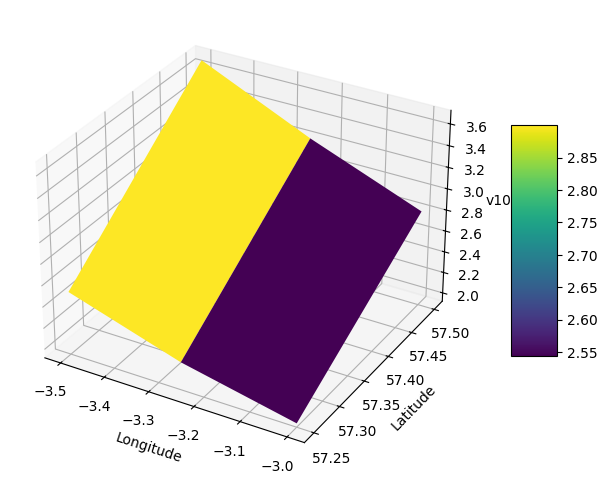

In [ ]:
import matplotlib.pyplot as plt

df = df_v100[:6][["latitude", "longitude", "v100"]].copy()

pivot = df.pivot(index="latitude", columns="longitude", values="v100")
X, Y = np.meshgrid(pivot.columns, pivot.index)
Z = pivot.values

# 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap="viridis")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("v100")
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
def linear_approximation(df, col):

    windfarm_lat = 57.33
    windfarm_long = -3.13
    lat1 = np.ceil(windfarm_lat / 0.25) * 0.25
    lat2 = np.floor(windfarm_lat / 0.25) * 0.25
    long1 = np.ceil(windfarm_long / 0.25) * 0.25
    long2 = np.floor(windfarm_long / 0.25) * 0.25

    assert np.abs(lat2 - lat1) == np.abs(long1 - long2) == 0.25, print(
        np.abs(lat2 - lat1), np.abs(long1 - long2)
    )
    # choose the four values the box within which is our wind farm
    df = df[
        (df["latitude"].isin([lat1, lat2])) & (df["longitude"].isin([long1, long2]))
    ]
    # sort by lat and long so we ensure that we take the diff of the smallest to biggest
    df = df[["time", "latitude", "longitude", col]].sort_values(
        ["time", "latitude", "longitude"]
    )

    # get the gradients of change in wind speed by change in coord withing the quadrant
    df = df.join(
        df.groupby(["time", "latitude"])[[col]].diff().rename(columns={col: "mlong"})
        / -0.25
    )
    df = df.join(
        df.groupby(["time", "longitude"])[[col]].diff().rename(columns={col: "mlat"})
        / -0.25
    )
    # and align those to the row where both at ad long has changed (the patial derivatives, ( we have assumed dy/dx and dy/dz are independent here)
    df = df.drop(["mlong", "mlat"], axis=1).join(
        df.groupby("time")[["mlong", "mlat"]].transform(
            lambda x: x.dropna().iloc[0] if x.notna().any() else pd.NA
        )
    )

    # get the wind speed in the moiddle of the quadrant going from each of the two sides and take the average
    df["latitude_wf"] = windfarm_lat
    df["longitude_wf"] = windfarm_long
    df["latitude_wf_diff"] = df["latitude_wf"] - df["latitude"]
    df["longitude_wf_diff"] = df["longitude_wf"] - df["longitude"]
    df[f"{col}_wf"] = (
        df[col]
        + df["mlong"] * df["longitude_wf_diff"]
        + df["mlat"] * df["latitude_wf_diff"]
    )
    df = df.join(
        df.groupby(["time"])[[f"{col}_wf"]]
        .transform(lambda x: (x.iloc[0] + x.iloc[3]) / 2)
        .rename(columns={f"{col}_wf": f"{col}_wf_avg"})
    )
    # just keep the info we need now
    df = (
        df[["time", f"{col}_wf_avg"]]
        .rename(columns={f"{col}_wf_avg": col})
        .drop_duplicates()
    )

    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = pd.to_numeric(df[col], errors="coerce")
    return df


def get_wind_angle(df_gcmwf):
    df_gcmwf["angle"] = (
        np.arctan(np.abs(df_gcmwf["v100"]) / np.abs(df_gcmwf["u100"])) * 180 / np.pi
    )
    # df_gcmwf['angle'] = np.arcsin(df_gcmwf['v100']/df_gcmwf['u100'])*180/np.pi
    df_gcmwf["angle"] = np.where(
        (df_gcmwf["v100"] > 0) & (df_gcmwf["u100"] > 0),
        df_gcmwf["angle"],
        np.where(
            (df_gcmwf["v100"] < 0) & (df_gcmwf["u100"] > 0),
            360 - df_gcmwf["angle"],
            np.where(
                (df_gcmwf["v100"] > 0) & (df_gcmwf["u100"] < 0),
                180 - df_gcmwf["angle"],
                np.where(
                    (df_gcmwf["v100"] < 0) & (df_gcmwf["u100"] < 0),
                    270 - df_gcmwf["angle"],
                    df_gcmwf["angle"],
                ),
            ),
        ),
    )
    return df_gcmwf


# get point of wind at wind farm location
df_gcmwf = linear_approximation(df_v100, "v100")
df_gcmwf = df_gcmwf.merge(linear_approximation(df_u100, "u100"), on=["time"])
# get actual wind speed using pythag
df_gcmwf["h100"] = np.sqrt(df_gcmwf["v100"] ** 2 + df_gcmwf["u100"] ** 2)
# get wind direction using pythag
df_gcmwf = get_wind_angle(df_gcmwf)

0.25 0.25
0.25 0.25


,time,v100,u100
0,2024-01-01 00:00:00,2.681975,3.502672
1,2024-01-01 01:00:00,2.593837,3.968123
2,2024-01-01 02:00:00,2.373727,4.022462
3,2024-01-01 03:00:00,2.363149,3.572258
4,2024-01-01 04:00:00,2.581705,3.673790
...,...,...,...
14934,2025-09-14 06:00:00,1.362371,4.310803
14935,2025-09-14 07:00:00,1.621157,3.357830
14936,2025-09-14 08:00:00,1.360023,1.421517
14937,2025-09-14 09:00:00,1.548489,-0.124371


In [173]:
df_gcmwf

,time,v100,u100,h100,angle
0,2024-01-01 00:00:00,2.681975,3.502672,4.411542,37.441065
1,2024-01-01 01:00:00,2.593837,3.968123,4.740674,33.171380
2,2024-01-01 02:00:00,2.373727,4.022462,4.670629,30.545618
3,2024-01-01 03:00:00,2.363149,3.572258,4.283165,33.485751
4,2024-01-01 04:00:00,2.581705,3.673790,4.490204,35.097094
...,...,...,...,...,...
14934,2025-09-14 06:00:00,1.362371,4.310803,4.520960,17.538438
14935,2025-09-14 07:00:00,1.621157,3.357830,3.728696,25.771210
14936,2025-09-14 08:00:00,1.360023,1.421517,1.967326,43.733502
14937,2025-09-14 09:00:00,1.548489,-0.124371,1.553476,94.591994


In [ ]:
Factors:
Power curves:
Wind speed, min/max wind speed and power

Wind speed: 40-160m which is where turbine is (faster)

In [ ]:
Wind power losses:
turbine availability
electrical losses
wake effect
turbine performance and control
environmental losses
curtailment

general degradation: 1.6% per year


In [ ]:
import pandas as pd
import sys
import numpy as np

sys.path.append("../../")
# get repo root actual dir (for file reading)
from helpers.system_helpers.repo_root import REPO_ROOT
from helpers.data_helpers.elexon_api_helpers import (
    create_dates_list,
    fetch_physical_data,
    call_physbm_api,
)
from helpers.constants import DATA_DIR
from datetime import date
import xarray as xr

config = {
    "start_date": "01/01/2024",
    #   'end_date' : date.today().strftime('%d/%m/%Y'),
    "end_date": "02/01/2024",
    "repd_name": "doronell",
    "elexon_id": ["T_DOREW-1", "T_DOREW-2"],
}

start_date = config["start_date"]
end_date = config["end_date"]
repd_name = config["repd_name"]
elexon_id = config["elexon_id"]

# 1. get and save PN data of doronell
dates_list = create_dates_list(start_date, end_date, months_delta=3)


# 2. get and process ECMWF data of doronell location
# ECMWF data
# Open GRIB file
# ds = xr.open_dataset(f'{REPO_ROOT}/data/doronell_data/doronell_ecmwf.grib', engine="cfgrib")

In [ ]:
for date1, date2 in dates_list:
    print(date1, date2)
    a = fetch_physical_data(
        date1,
        date2,
        save_dir=DATA_DIR / "doronell_data/pn_db/",
        cache=True,
        unit_ids=["T_DOREW-1", "T_DOREW-2"],
        multiprocess=True,
        pull_data_once=False,
    )

INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-1
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-2
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:00:00


01/01/2024 02/01/2024


INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 02:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 02:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 02:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 02:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 03:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 03:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 03:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 03:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 04:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 04:00:00
INFO:helpers.data_helpers.el

KeyError: "['nationalGridBmUnit'] not found in axis"

In [3]:
a

,dataset,settlementDate,settlementPeriod,timeFrom,timeTo,levelFrom,levelTo,nationalGridBmUnit,bmUnit
0,PN,2023-12-31,48,2023-12-31T23:30:00Z,2024-01-01T00:00:00Z,1,0,DOREW-2,T_DOREW-2
1,PN,2024-01-01,1,2024-01-01T00:00:00Z,2024-01-01T00:30:00Z,0,0,DOREW-2,T_DOREW-2
2,PN,2024-01-01,2,2024-01-01T00:30:00Z,2024-01-01T01:00:00Z,0,0,DOREW-2,T_DOREW-2
3,PN,2024-01-01,3,2024-01-01T01:00:00Z,2024-01-01T01:30:00Z,0,0,DOREW-2,T_DOREW-2
4,PN,2024-01-01,4,2024-01-01T01:30:00Z,2024-01-01T02:00:00Z,0,0,DOREW-2,T_DOREW-2
...,...,...,...,...,...,...,...,...,...
93,PN,2024-01-01,44,2024-01-01T21:30:00Z,2024-01-01T22:00:00Z,37,35,DOREW-1,T_DOREW-1
94,PN,2024-01-01,45,2024-01-01T22:00:00Z,2024-01-01T22:30:00Z,45,56,DOREW-1,T_DOREW-1
95,PN,2024-01-01,46,2024-01-01T22:30:00Z,2024-01-01T23:00:00Z,56,68,DOREW-1,T_DOREW-1
96,PN,2024-01-01,47,2024-01-01T23:00:00Z,2024-01-01T23:30:00Z,68,78,DOREW-1,T_DOREW-1


In [ ]:
for date1, date2 in dates_list:
    a = call_physbm_api(date1, date2)

INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for None
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 01:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 02:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 02:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 03:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 03:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 04:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 04:30:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 05:00:00
INFO:helpers.data_helpers.elexon_api_h

In [4]:
a

,recordType,settlementDate,settlementPeriod,timeFrom,timeTo,levelFrom,levelTo,Accept ID,acceptanceTime,deemedBidOfferFlag,soFlag,rrScheduleFlag,bmUnitID,local_datetime
0,BOALF,2024-01-01,2,2024-01-01T00:30:00Z,2024-01-01T01:00:00Z,176,176,99548.0,2023-12-31T23:31:00Z,False,True,False,T_CARR-2,2024-01-01 00:30:00+00:00
1,BOALF,2024-01-01,2,2024-01-01T00:30:00Z,2024-01-01T01:00:00Z,300,300,182260.0,2023-12-31T23:31:00Z,False,True,False,T_DRAXX-3,2024-01-01 00:30:00+00:00
2,BOALF,2024-01-01,2,2024-01-01T00:30:00Z,2024-01-01T00:50:00Z,185,185,143728.0,2023-12-31T23:32:00Z,False,True,False,T_LBAR-1,2024-01-01 00:30:00+00:00
3,BOALF,2024-01-01,1,2024-01-01T00:26:00Z,2024-01-01T00:56:00Z,27,27,39430.0,2024-01-01T00:11:00Z,False,False,False,E_BURBO,2024-01-01 00:26:00+00:00
4,BOALF,2024-01-01,1,2024-01-01T00:26:00Z,2024-01-01T00:27:00Z,27,86,39429.0,2023-12-31T23:41:00Z,False,False,False,E_BURBO,2024-01-01 00:26:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,PN,2024-01-01,48,2024-01-01T23:30:00Z,2024-01-02T00:00:00Z,0,0,NaN,NaN,NaN,NaN,NaN,V__NFLEX001,2024-01-01 23:30:00+00:00
1946,PN,2024-01-01,48,2024-01-01T23:30:00Z,2024-01-02T00:00:00Z,0,0,NaN,NaN,NaN,NaN,NaN,V__NFLEX002,2024-01-01 23:30:00+00:00
1947,PN,2024-01-01,48,2024-01-01T23:30:00Z,2024-01-02T00:00:00Z,0,0,NaN,NaN,NaN,NaN,NaN,V__NHABI005,2024-01-01 23:30:00+00:00
1948,PN,2024-01-01,48,2024-01-01T23:30:00Z,2024-01-02T00:00:00Z,1,1,NaN,NaN,NaN,NaN,NaN,V__PFLEX001,2024-01-01 23:30:00+00:00


In [7]:
a

,dataset,settlementDate,settlementPeriodFrom,settlementPeriodTo,timeFrom,timeTo,levelFrom,levelTo,acceptanceNumber,acceptanceTime,deemedBoFlag,soFlag,amendmentFlag,storFlag,rrFlag,nationalGridBmUnit,bmUnit
0,BOALF,2024-01-01,2,3,2024-01-01T00:30:00Z,2024-01-01T01:00:00Z,176,176,99548,2023-12-31T23:31:00Z,False,True,ORI,False,False,CARR-2,T_CARR-2
1,BOALF,2024-01-01,2,3,2024-01-01T00:30:00Z,2024-01-01T01:00:00Z,300,300,182260,2023-12-31T23:31:00Z,False,True,ORI,False,False,DRAXX-3,T_DRAXX-3
2,BOALF,2024-01-01,2,2,2024-01-01T00:30:00Z,2024-01-01T00:50:00Z,185,185,143728,2023-12-31T23:32:00Z,False,True,ORI,False,False,LBAR-1,T_LBAR-1
3,BOALF,2024-01-01,1,2,2024-01-01T00:26:00Z,2024-01-01T00:56:00Z,27,27,39430,2024-01-01T00:11:00Z,False,False,ORI,False,False,BURBW-1,E_BURBO
4,BOALF,2024-01-01,1,1,2024-01-01T00:26:00Z,2024-01-01T00:27:00Z,27,86,39429,2023-12-31T23:41:00Z,False,False,ORI,False,False,BURBW-1,E_BURBO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,BOALF,2024-01-01,48,1,2024-01-01T23:30:00Z,2024-01-02T00:00:00Z,185,185,143746,2024-01-01T22:32:00Z,False,True,ORI,False,False,LBAR-1,T_LBAR-1
326,BOALF,2024-01-01,48,48,2024-01-01T23:30:00Z,2024-01-01T23:38:00Z,0,0,48787,2024-01-01T23:22:00Z,False,False,ORI,False,False,BRYBW-1,E_BRYBW-1
327,BOALF,2024-01-01,48,48,2024-01-01T23:30:00Z,2024-01-01T23:31:00Z,-3,-2,2635,2024-01-01T23:17:00Z,False,False,ORI,False,False,AG-HLIM03,2__HANGE003
328,BOALF,2024-01-01,48,48,2024-01-01T23:30:00Z,2024-01-01T23:31:00Z,-275,-278,131907,2024-01-01T23:23:00Z,False,False,ORI,False,False,DINO-4,T_DINO-4


In [2]:
dates_list

[['01/01/2024', '02/01/2024']]